In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import requests
import time
import pprint
import csv

fire_state = "output_data/Amazon_mean_df.csv"
defo_state = "output_data/deforestation_mean_merge.csv"

fire_mean_df = pd.read_csv(fire_state)
defo_mean_df = pd.read_csv(defo_state)

In [44]:
fire_mean_df

,States,Number of Fires
0,AC,3417.25
1,AM,5873.35
2,AP,1255.80
3,MA,18763.95
4,MT,32729.50
5,PA,28892.05
6,RO,9269.35
7,RR,1472.70
8,TO,10621.60


In [45]:
new_fire_mean = fire_mean_df.rename(columns={"Unnamed: 0": "States"})
new_fire_mean

,States,Number of Fires
0,AC,3417.25
1,AM,5873.35
2,AP,1255.80
3,MA,18763.95
4,MT,32729.50
5,PA,28892.05
6,RO,9269.35
7,RR,1472.70
8,TO,10621.60


In [46]:
defo_mean_df

,Unnamed: 0,state,square km
0,0,AC,424.70
1,1,AM,751.90
2,2,AP,32.30
3,3,MA,709.65
4,4,MT,4284.40
5,5,PA,4683.75
6,6,RO,1797.55
7,7,RR,232.15
8,8,TO,139.40


In [47]:
new = defo_mean_df.drop(['Unnamed: 0'], axis=1)
new_defo_mean = new.rename(columns={"state": "States", "square km": "Square km"})
new_defo_mean

,States,Square km
0,AC,424.70
1,AM,751.90
2,AP,32.30
3,MA,709.65
4,MT,4284.40
5,PA,4683.75
6,RO,1797.55
7,RR,232.15
8,TO,139.40


In [50]:
merged_mean = new_defo.merge(new_fire, on='States')
merged_mean
merged_mean.to_csv("output_data/merged_fire_defo_mean.csv")

In [51]:
xaxis = list(new_defo_mean.States)
xaxis

['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']

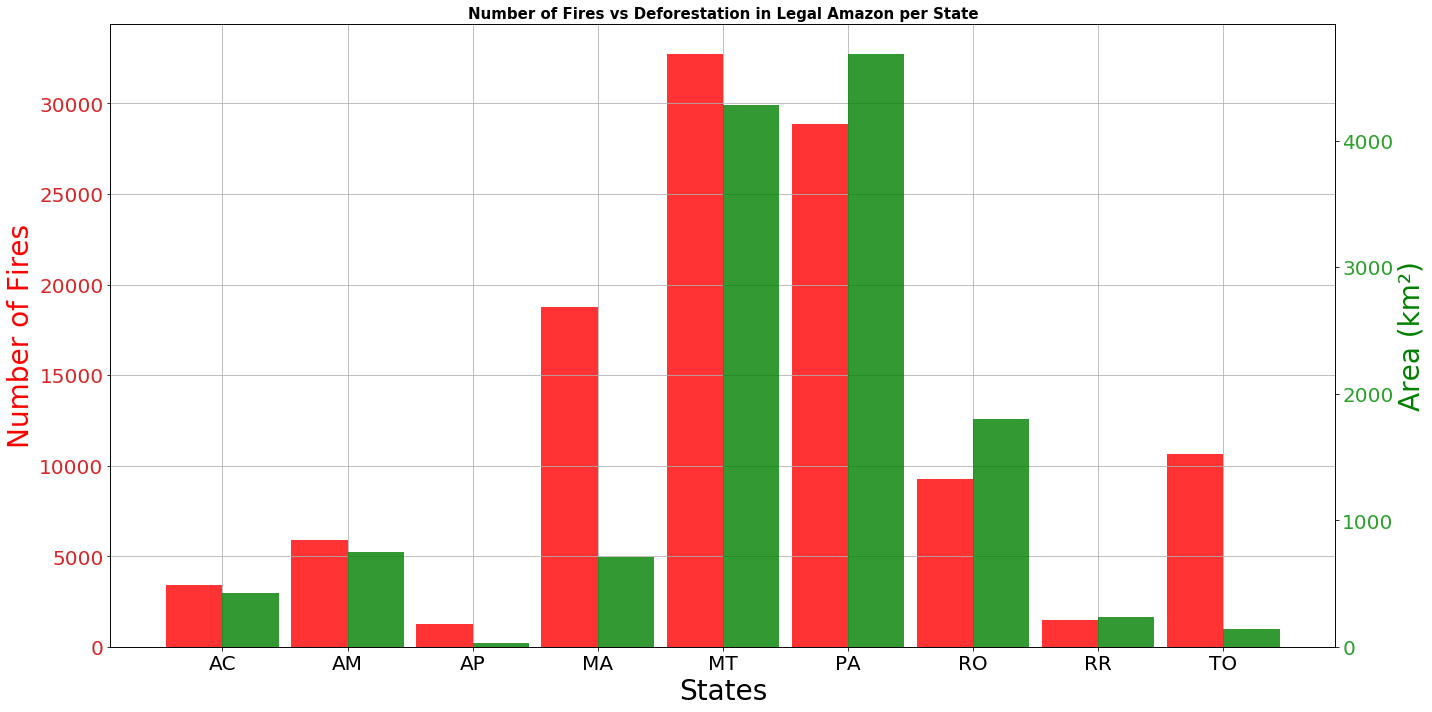

In [52]:

# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))
# Deforestation
for index, row in merged_mean.iterrows():
    def_graph = ax1.bar(merged_mean["States"][index], merged_mean["Number of Fires"][index],color='red', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Number of Fires vs Deforestation in Legal Amazon per State", fontweight = "bold", fontsize = 15)
ax1.set_xlabel("States",fontsize = 28)
ax1.set_ylabel("Number of Fires",fontsize = 28, color ='r')
ax1.tick_params(axis='y',labelcolor='tab:red', labelsize = 20)
# Rain
ax2 = ax1.twinx()
for index, row in merged_mean.iterrows():
    rain_graph = ax2.bar(merged_mean["States"][index], merged_mean["Square km"][index],color='green', alpha=.8,\
                        align="edge",width=+0.45)
ax2.set_ylabel("Area (km²)",fontsize = 28, color ='g')
ax2.tick_params(axis='y',labelcolor='tab:green', labelsize = 20)
#other configurations
plt.xticks(xaxis, rotation=90)
ax1.tick_params(axis='x',labelsize = 20)
plt.tight_layout()
ax1.grid()
#save figure
plt.savefig("output_data/FireXDefo.png", dpi=fig.dpi)
plt.show()

In [65]:
fire_year = "output_data/fires_year_sum_df.csv"
defo_year = "output_data/defor_year_sum.csv"

fire_year_sum_df = pd.read_csv(fire_year)
defo_year_sum_df = pd.read_csv(defo_year)

In [66]:
merded_fire_defo = pd.merge(fire_year_sum_df, defo_year_sum_df, on=['year'])

In [67]:
merded_fire_defo

,year,Number of Fires,square km
0,1998,123881,17383.0
1,1999,132526,17259.0
2,2000,97541,18226.0
3,2001,137926,18165.0
4,2002,220015,21650.0
5,2003,208476,25396.0
6,2004,248928,27772.0
7,2005,224294,19014.0
8,2006,123327,14286.0
9,2007,206412,11651.0


In [69]:
x_axis_fire_defo = list(merded_fire_defo.year)
tick_locations = [value for value in x_axis_fire_defo]

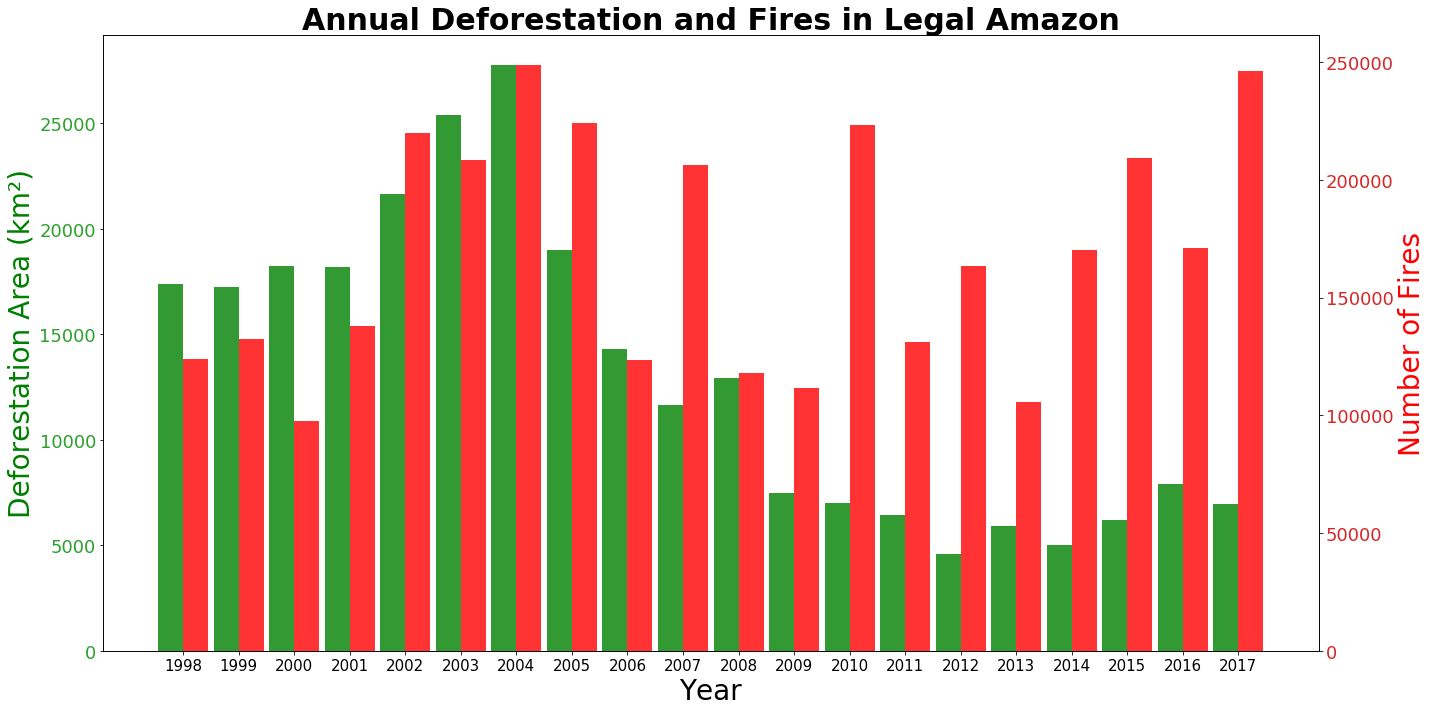

In [70]:
# Create 2 bar graph in the same fig for Annual Deforestation and rain in Legal Amazon.
fig, ax1 = plt.subplots(figsize=(20, 10))

# Deforestation
for index, row in merded_fire_defo.iterrows():
    def_graph = ax1.bar(merded_fire_defo["year"][index], merded_fire_defo["square km"][index],  color='g', alpha=.8,\
                        align="edge",width=-0.45)
ax1.set_title("Annual Deforestation and Fires in Legal Amazon", fontweight = "bold", fontsize = 30)
ax1.set_xlabel("Year",fontsize = 28)
ax1.set_ylabel("Deforestation Area (km²)",fontsize = 28, color ='g')
ax1.tick_params(axis='y',labelcolor='tab:green', labelsize = 18)

# Rain
ax2 = ax1.twinx()
for index, row in merded_fire_defo.iterrows():
    rain_graph = ax2.bar(merded_fire_defo["year"][index], merded_fire_defo["Number of Fires"][index],  color='r', alpha=.8,\
                         align="edge", width=0.45)
ax2.set_ylabel("Number of Fires",fontsize = 28, color ='r')
ax2.tick_params(axis='y',labelcolor='tab:red', labelsize = 18)

#other configurations
plt.xticks(tick_locations, x_axis_fire_defo, rotation=90)
ax1.tick_params(axis='x',labelsize = 15)
plt.tight_layout()
ax.grid()

#save figure
plt.savefig("output_data/defor_fire_year.png", dpi=fig.dpi)
plt.show()

In [34]:
merged

,States,Square km,Number of Fires
0,AC,424.70,3417.25
1,AM,751.90,5873.35
2,AP,32.30,1255.80
3,MA,709.65,18763.95
4,MT,4284.40,32729.50
5,PA,4683.75,28892.05
6,RO,1797.55,9269.35
7,RR,232.15,1472.70
8,TO,139.40,10621.60


In [35]:
x = merged['Square km']
x

0     424.70
1     751.90
2      32.30
3     709.65
4    4284.40
5    4683.75
6    1797.55
7     232.15
8     139.40
Name: Square km, dtype: float64

In [73]:
#linear regression

X = merged['Number of Fires'].values.reshape(-1, 1) 
Y = merged['Square km'].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
# perform linear regression
linear_regressor.fit(X, Y)  
# make predictions
Y_pred = linear_regressor.predict(X)  


# correlation matrices 
#correlation coefficient 

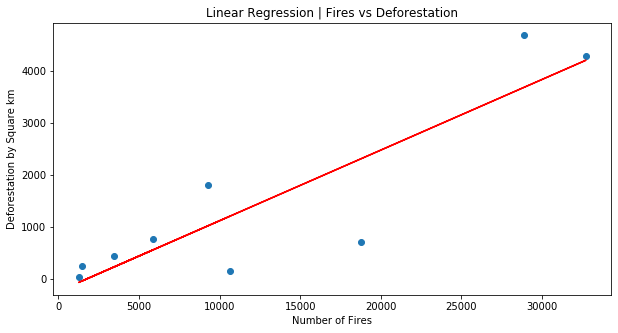

<Figure size 432x288 with 0 Axes>

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.title("Linear Regression | Fires vs Deforestation")
plt.xlabel("Number of Fires")
plt.ylabel("Deforestation by Square km")

plt.show()

plt.savefig("output_data/LinearRegression.png")

In [40]:
print(linear_regressor.coef_)

[[0.1359993]]


In [41]:
# Correlation Coefficient 
# and R-square 

merged.corr(method ='pearson')

,Square km,Number of Fires
Square km,1.00000,0.88839
Number of Fires,0.88839,1.00000


In [75]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model=sm.OLS(X,Y)

result=model.fit()

print(result.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              54.93
Date:                Thu, 21 May 2020   Prob (F-statistic):                    7.54e-05
Time:                        22:46:08   Log-Likelihood:                         -90.991
No. Observations:                   9   AIC:                                      184.0
Df Residuals:                       8   BIC:                                      184.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\joaog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [71]:
x1 = merded_fire_defo['square km']
x1

0     17383.0
1     17259.0
2     18226.0
3     18165.0
4     21650.0
5     25396.0
6     27772.0
7     19014.0
8     14286.0
9     11651.0
10    12911.0
11     7464.0
12     7000.0
13     6418.0
14     4571.0
15     5891.0
16     5012.0
17     6207.0
18     7893.0
19     6947.0
Name: square km, dtype: float64

In [76]:
#linear regression

X1 = merded_fire_defo['Number of Fires'].values.reshape(-1, 1) 
Y1 = merded_fire_defo['square km'].values.reshape(-1, 1)
linear_regressor1 = LinearRegression() 
# perform linear regression
linear_regressor1.fit(X1, Y1)  
# make predictions
Y1_pred = linear_regressor1.predict(X1)  


# correlation matrices 
#correlation coefficient 

In [77]:
print(linear_regressor1.coef_)

[[0.02949373]]


In [80]:
# Correlation Coefficient 
# and R-square 

merded_fire_defo.corr(method ='pearson')

,year,Number of Fires,square km
year,1.000000,0.216890,-0.803368
Number of Fires,0.216890,1.000000,0.207138
square km,-0.803368,0.207138,1.000000


In [78]:
model1=sm.OLS(X,Y)

result1=model1.fit()

print(result1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              54.93
Date:                Thu, 21 May 2020   Prob (F-statistic):                    7.54e-05
Time:                        22:46:27   Log-Likelihood:                         -90.991
No. Observations:                   9   AIC:                                      184.0
Df Residuals:                       8   BIC:                                      184.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\joaog\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


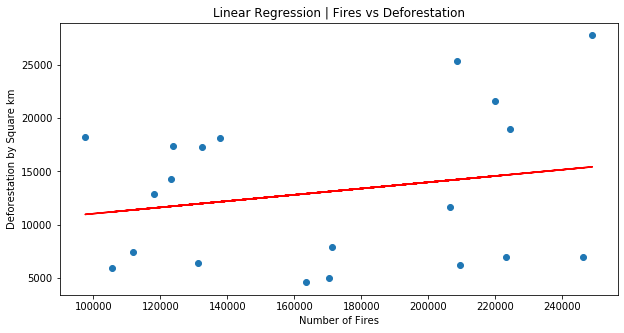

<Figure size 432x288 with 0 Axes>

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')

plt.title("Linear Regression | Fires vs Deforestation")
plt.xlabel("Number of Fires")
plt.ylabel("Deforestation by Square km")

plt.show()

plt.savefig("output_data/LinearRegression1.png")

In [ ]:
#multi colinearity, the two numeric variables you are looking at are too similar, regression splits in half